In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon 
import os

## Zoning data

In [2]:
zoning = pd.read_csv('zoning-districts-and-labels.csv', sep=';')

In [3]:
zoning['Coord'] = zoning['Geom'].apply(lambda row: eval(row)['coordinates'][0])

In [4]:
#zoning.drop(['Geom', 'ZONE_NAME'], axis=1, inplace=True)

In [5]:
zoning.head()

,CATEGORY,ZONE_NAME,Geom,Coord
0,Comprehensive Development,CD-1 (552),"{""type"": ""Polygon"", ""coordinates"": [[[-123.152...","[[-123.152300081, 49.2629440275], [-123.152303..."
1,Comprehensive Development,FCCDD,"{""type"": ""Polygon"", ""coordinates"": [[[-123.132...","[[-123.132355799, 49.2756437046], [-123.131347..."
2,One-Family Dwelling,RS-1,"{""type"": ""Polygon"", ""coordinates"": [[[-123.058...","[[-123.058765338, 49.2374067113], [-123.058773..."
3,One-Family Dwelling,RS-1,"{""type"": ""Polygon"", ""coordinates"": [[[-123.045...","[[-123.045910007, 49.2360271549], [-123.045911..."
4,One-Family Dwelling,RS-1,"{""type"": ""Polygon"", ""coordinates"": [[[-123.057...","[[-123.057410131, 49.2453483631], [-123.059719..."


## Public Street Data

In [6]:
pbs = pd.read_csv('public-streets.csv', sep=';')

In [7]:
# pbs.drop(['STREETUSE'], axis=1, inplace=True)

In [8]:
pbs.head()

,Geom,HBLOCK,STREETUSE
0,"{""type"": ""LineString"", ""coordinates"": [[-123.0...",4800 RUPERT ST,Secondary Arterial
1,"{""type"": ""LineString"", ""coordinates"": [[-123.1...",GRANVILLE BRIDGE,Arterial
2,"{""type"": ""LineString"", ""coordinates"": [[-123.1...",STAMP'S LANDING,Residential
3,"{""type"": ""LineString"", ""coordinates"": [[-123.0...",1300 SE MARINE DRIVE,Arterial
4,"{""type"": ""LineString"", ""coordinates"": [[-123.0...",1400-1500 SE MARINE DRIVE,Arterial


## Parking tickets

In [9]:
import string
def clean(word):
    word_ = "".join( c for c in word.upper() if c not in string.punctuation )
    
    return word_

In [10]:
pt = []
pt_csv = ['parking-tickets-2017-2019.csv']
# pt_csv = [f for f in os.listdir('.') if f.startswith('parking-tickets')]
for f in pt_csv:
    pt.append(pd.read_csv(f, sep=';'))

In [140]:
pt2 = []
# pt_csv = ['parking-tickets-2017-2019.csv']
pt2_csv = [f for f in os.listdir('.') if f.startswith('parking-tickets')]
for f in pt2_csv:
    pt2.append(pd.read_csv(f, sep=';'))

In [141]:
parking_tic2 = pd.concat(pt2, axis=0)
parking_tic_filt2 = parking_tic2[parking_tic2['Status'].isin(['IS'])]
parking_tic_filt2 = parking_tic_filt2.sort_values('Year').reset_index().drop('index', axis=1)

/home/stanleygan/Downloads/bancars/bancars/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [142]:
parking_tic_filt2['Address'] = parking_tic_filt2['Block'].map(str) + ' ' + parking_tic_filt2['Street']
parking_tic_filt2['Address'] = parking_tic_filt2['Address'].apply(lambda row: clean(row))

In [154]:
parking_tic2_robson = parking_tic_filt2[parking_tic_filt2['Address'].str.contains('ROBSON ST')]
parking_tic2_robson = parking_tic2_robson[parking_tic2_robson['Year'] < 2019]

In [161]:
parking_tic2_chilco = parking_tic_filt2[parking_tic_filt2['Address'].str.contains('CHILCO')]
parking_tic2_chilco = parking_tic2_chilco[parking_tic2_chilco['Year'] < 2019]
chilco_over_yr = parking_tic2_chilco.groupby('Year').size()

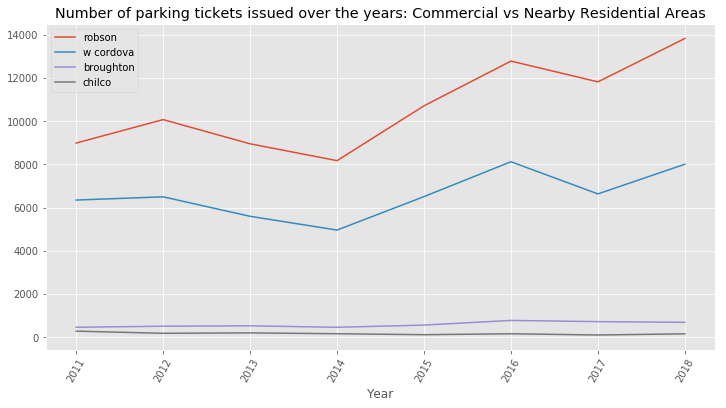

In [163]:
robson_over_yr = parking_tic2_robson.groupby('Year').size()
plt.figure(figsize=(12,6))
sns.lineplot(x=robson_over_yr.index, y=robson_over_yr, label='robson')
sns.lineplot(x=cord_over_yr.index, y=cord_over_yr, label='w cordova')
sns.lineplot(x=brough_over_yr.index, y=brough_over_yr, label='broughton')
sns.lineplot(x=chilco_over_yr.index, y=chilco_over_yr, label='chilco')
plt.xticks(rotation=60)
plt.title('Number of parking tickets issued over the years: Commercial vs Nearby Residential Areas')
plt.savefig('over_the_yr.png', dpi=300)

(array([2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
        2019.]), <a list of 10 Text xticklabel objects>)

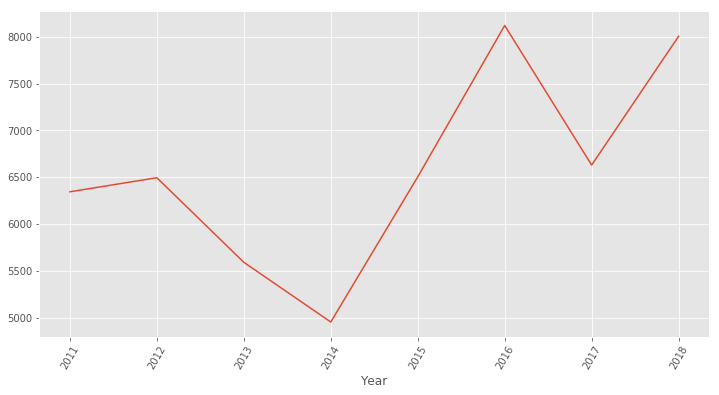

In [151]:
parking_tic2_cord = parking_tic_filt2[parking_tic_filt2['Address'].str.contains('ALBERNI ST')]
parking_tic2_cord = parking_tic2_cord[parking_tic2_cord['Year'] < 2019]
cord_over_yr = parking_tic2_cord.groupby('Year').size()
cord_over_yr
plt.figure(figsize=(12,6))
sns.lineplot(x=cord_over_yr.index, y=cord_over_yr)
plt.xticks(rotation=60)

(array([2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
        2019.]), <a list of 10 Text xticklabel objects>)

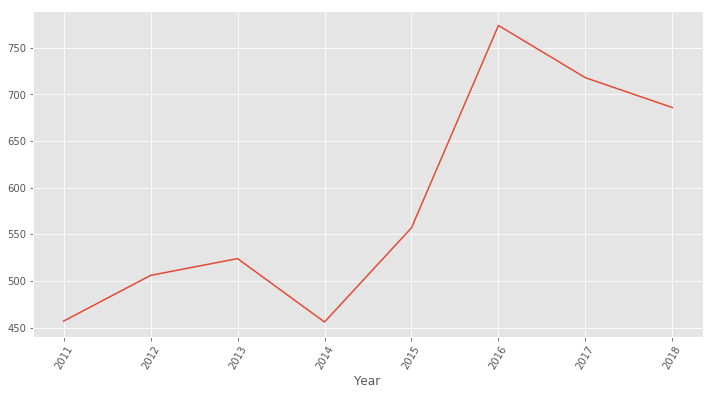

In [156]:
parking_tic2_brough = parking_tic_filt2[parking_tic_filt2['Address'].str.contains('BROUGHTON ST')]
parking_tic2_brough = parking_tic2_brough[parking_tic2_brough['Year'] < 2019]
brough_over_yr = parking_tic2_brough.groupby('Year').size()
plt.figure(figsize=(12,6))
sns.lineplot(x=brough_over_yr.index, y=brough_over_yr)
plt.xticks(rotation=60)

In [19]:
parking_tic = pd.concat(pt, axis=0)
parking_tic = parking_tic[parking_tic['EntryDate'] > "2019-09-01"]

In [20]:
parking_tic_filt = parking_tic[parking_tic['Status'].isin(['IS'])]

In [22]:
parking_tic_filt = parking_tic_filt.sort_values('Year').reset_index().drop('index', axis=1)

In [23]:
parking_tic_filt['Address'] = parking_tic_filt['Block'].map(str) + ' ' + parking_tic_filt['Street']

In [15]:
parking_tic_filt['Address'] = parking_tic_filt['Address'].apply(lambda row: clean(row))

In [16]:
parking_tic_filt.drop(['Block', 'Street', 'Status'], axis=1, inplace=True)

In [17]:
parking_tic_filt.head()

,Year,InfractionText,Address
0,2017,PARK IN A METERED SPACE IF THE PARKING METER H...,4300 MAIN ST
1,2017,PARK IN A METERED SPACE IF THE PARKING METER H...,500 BUTE ST
2,2017,STOP AT A PLACE WHERE A TRAFFIC SIGN PROHIBITS...,1600 CHARLES ST
3,2017,STOP AT A PLACE WHERE A TRAFFIC SIGN PROHIBITS...,1200 PENDER ST W
4,2017,PARK IN A METERED SPACE IF THE PARKING METER H...,1100 ALBERNI ST


Merge two data

In [24]:
merged = parking_tic_filt.merge(pbs, left_on='Address', right_on='HBLOCK')

In [51]:
selected = merged[merged['Address'].isin(['1000 ROBSON ST', '800 BROUGHTON ST', '200 THURLOW ST', '100 W CORDOVA ST'])]

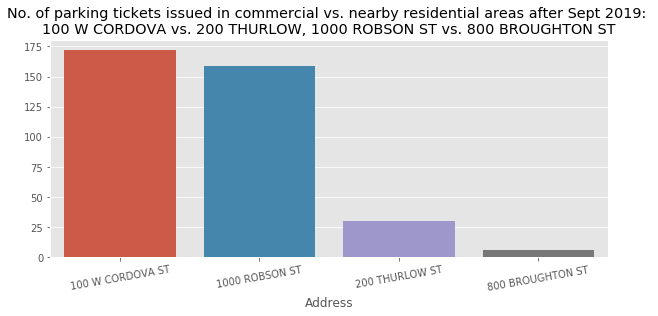

In [166]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
count = selected.groupby(['Address']).size()
plt.figure(figsize=(10,4))
sns.barplot(x=count.index, y=count)
plt.xticks(rotation=10)
plt.title('No. of parking tickets issued in commercial vs. nearby residential areas after Sept 2019: \n100 W CORDOVA vs. 200 THURLOW, 1000 ROBSON ST vs. 800 BROUGHTON ST')
plt.savefig('diff_commercial_res.png', dpi=300)

In [70]:
from IPython.display import display
display(selected.groupby(['Street', 'InfractionText']).size().sort_values(ascending=False))

Street        InfractionText                                                                                                                                                                                           
ROBSON ST     PARK IN A METERED SPACE IF THE PARKING METER HEAD DISPLAYS FOUR FLASHING ZEROS IN A WINDOW                                                                                                                   138
W CORDOVA ST  PARK IN A METERED SPACE IF THE PARKING METER HEAD DISPLAYS FOUR FLASHING ZEROS IN A WINDOW                                                                                                                    98
              STOP AT A PLACE WHERE A TRAFFIC SIGN PROHIBITS STOPPING                                                                                                                                                       28
THURLOW ST    PARK IN A METERED SPACE IF THE PARKING METER HEAD DISPLAYS FOUR FLASHING ZEROS IN A WINDOW           

In [71]:
merged[merged['Address']]

,Block,Street,EntryDate,Bylaw,Section,Status,InfractionText,Year,Address,Geom,HBLOCK,STREETUSE
0,400,ROBSON ST,2019-09-06,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2019,400 ROBSON ST,"{""type"": ""LineString"", ""coordinates"": [[-123.1...",400 ROBSON ST,Arterial
1,400,ROBSON ST,2019-09-06,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2019,400 ROBSON ST,"{""type"": ""LineString"", ""coordinates"": [[-123.1...",400 ROBSON ST,Arterial
2,400,ROBSON ST,2019-09-17,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2019,400 ROBSON ST,"{""type"": ""LineString"", ""coordinates"": [[-123.1...",400 ROBSON ST,Arterial
3,400,ROBSON ST,2019-09-17,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2019,400 ROBSON ST,"{""type"": ""LineString"", ""coordinates"": [[-123.1...",400 ROBSON ST,Arterial
4,400,ROBSON ST,2019-09-04,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2019,400 ROBSON ST,"{""type"": ""LineString"", ""coordinates"": [[-123.1...",400 ROBSON ST,Arterial


In [ ]:
selected.groupby

In [42]:
sorted(merged[ merged['STREETUSE'] != 'Residential' ]['Address'].unique().tolist())

['0 ALEXANDER ST',
 '0 E BROADWAY',
 '0 E CORDOVA ST',
 '0 E HASTINGS ST',
 '0 E PENDER ST',
 '0 KEEFER PLACE',
 '0 KEEFER ST',
 '0 NELSON ST',
 '0 POWELL ST',
 '0 SMITHE ST',
 '0 W BROADWAY',
 '0 W CORDOVA ST',
 '0 W HASTINGS ST',
 '0 W PENDER ST',
 '0 WATER ST',
 '100 ABBOTT ST',
 '100 ALEXANDER ST',
 '100 CAMBIE ST',
 '100 CARRALL ST',
 '100 COLUMBIA ST',
 '100 DUNSMUIR ST',
 '100 E BROADWAY',
 '100 E CORDOVA ST',
 '100 E HASTINGS ST',
 '100 E PENDER ST',
 '100 KEEFER ST',
 '100 MAIN ST',
 '100 POWELL ST',
 '100 ROBSON ST',
 '100 VICTORIA DRIVE',
 '100 W BROADWAY',
 '100 W CORDOVA ST',
 '100 W GEORGIA ST',
 '100 W HASTINGS ST',
 '100 W PENDER ST',
 '100 WATER ST',
 '1000 ALBERNI ST',
 '1000 BURRARD ST',
 '1000 COMMERCIAL DRIVE',
 '1000 DAVIE ST',
 '1000 DENMAN ST',
 '1000 DUNSMUIR ST',
 '1000 E BROADWAY',
 '1000 E HASTINGS ST',
 '1000 EVELEIGH ST',
 '1000 GRANVILLE ST',
 '1000 HAMILTON ST',
 '1000 HARO ST',
 '1000 HOMER ST',
 '1000 HORNBY ST',
 '1000 HOWE ST',
 '1000 KINGSWAY',
 '10

In [27]:
merged['Address'].unique().tolist()

['400 ROBSON ST',
 '1300 RICHARDS ST',
 '2400 PINE ST',
 '1800 FIR ST',
 '1600 W BROADWAY',
 '2400 MAPLE ST',
 '2200 W BROADWAY',
 '2100 W BROADWAY',
 '3000 E PENDER ST',
 '500 LILLOOET ST',
 '1000 ALBERNI ST',
 '500 RUPERT ST',
 '200 N PENTICTON ST',
 '400 HOWE ST',
 '700 THURLOW ST',
 '600 NELSON ST',
 '900 COOPERAGE WAY',
 '5600 YEW ST',
 '1700 MAPLE ST',
 '100 N SLOCAN ST',
 '3000 MAIN ST',
 '700 BUTE ST',
 '3300 CAMBIE ST',
 '1200 GRANVILLE ST',
 '100 DRAKE ST',
 '1100 MAINLAND ST',
 '300 N RENFREW ST',
 '2600 W BROADWAY',
 '1700 PENDRELL ST',
 '2800 VENABLES ST',
 '100 E BROADWAY',
 '400 RAILWAY ST',
 '200 SLOCAN ST',
 '200 RENFREW ST',
 '2800 E HASTINGS ST',
 '2500 MANITOBA ST',
 '100 W BROADWAY',
 '1700 HARO ST',
 '1100 ROBSON ST',
 '200 ABBOTT ST',
 '300 CAMBIE ST',
 '400 HAMILTON ST',
 '400 GARDEN DRIVE',
 '3600 SOPHIA ST',
 '700 RICHARDS ST',
 '400 W BROADWAY',
 '600 HELMCKEN ST',
 '1300 HOMER ST',
 '3400 E PENDER ST',
 '1000 RICHARDS ST',
 '3100 CAMBIE ST',
 '1200 MELVILLE 

In [19]:
merged['Coord'] = merged['Geom'].apply(lambda row: eval(row)['coordinates'][0])

In [20]:
geometry = [Point(x, y) for x, y in merged['Coord']]
merged.head()

,Year,InfractionText,Address,Geom,HBLOCK,STREETUSE,Coord
0,2017,PARK IN A METERED SPACE IF THE PARKING METER H...,500 BUTE ST,"{""type"": ""LineString"", ""coordinates"": [[-123.1...",500 BUTE ST,Arterial,"[-123.123635307, 49.2882178189]"
1,2017,PARK IN A METERED SPACE IF THE PARKING METER H...,500 BUTE ST,"{""type"": ""LineString"", ""coordinates"": [[-123.1...",500 BUTE ST,Arterial,"[-123.12337273, 49.2883915624]"
2,2017,PARK IN A METERED SPACE IF THE PARKING METER H...,500 BUTE ST,"{""type"": ""LineString"", ""coordinates"": [[-123.1...",500 BUTE ST,Arterial,"[-123.123635307, 49.2882178189]"
3,2017,PARK IN A METERED SPACE IF THE PARKING METER H...,500 BUTE ST,"{""type"": ""LineString"", ""coordinates"": [[-123.1...",500 BUTE ST,Arterial,"[-123.12337273, 49.2883915624]"
4,2017,PARK IN A METERED SPACE IF THE PARKING METER H...,500 BUTE ST,"{""type"": ""LineString"", ""coordinates"": [[-123.1...",500 BUTE ST,Arterial,"[-123.123635307, 49.2882178189]"


In [27]:
points = ['500 ABBOTT ST', '1100 ALBERNI ST']
merged[merged['Address'].isin(points)].groupby(['InfractionText', 'Address']).size().sort_values(ascending=False)

InfractionText                                                                                                                                                                                             Address        
PARK IN A METERED SPACE IF THE PARKING METER HEAD DISPLAYS FOUR FLASHING ZEROS IN A WINDOW                                                                                                                 1100 ALBERNI ST    8325
                                                                                                                                                                                                           500 ABBOTT ST      4690
STOP AT A PLACE WHERE A TRAFFIC SIGN PROHIBITS STOPPING                                                                                                                                                    500 ABBOTT ST      4548
                                                                                                    

In [23]:
merged.groupby('HBLOCK').size().sort_values(ascending=False)

HBLOCK
500 ABBOTT ST              9610
1100 ALBERNI ST            8668
700 THURLOW ST             7773
3300 KINGSWAY              7684
400 ROBSON ST              6718
800 RICHARDS ST            6509
700 NELSON ST              6480
800 HOMER ST               6466
100 POWELL ST              6320
0 W PENDER ST              6304
1000 ROBSON ST             6297
500 HAMILTON ST            6288
1000 HOMER ST              6218
1100 HOMER ST              6015
1100 ROBSON ST             5840
300 CAMBIE ST              5836
600 CITADEL PARADE         5550
600 SEYMOUR ST             5490
700 BUTE ST                5463
100 ALEXANDER ST           5280
700 RICHARDS ST            5142
500 ROBSON ST              5092
800 BURRARD ST             4998
700 BURRARD ST             4896
800 SEYMOUR ST             4821
1000 ALBERNI ST            4807
900 BURRARD ST             4767
1000 W CORDOVA ST          4739
500 HOWE ST                4706
400 RAILWAY ST             4698
                           ... 
6

In [73]:
merged.drop('Geom', inplace=True, axis=1)

In [77]:
merged.drop('Coord', inplace=True, axis=1)

In [28]:
merged.to_csv('public_street_2019parkingtix.csv')

In [78]:
from geopandas import GeoDataFrame
gdf = GeoDataFrame(merged, geometry=geometry)

In [79]:
gdf.to_file('public_street_2019parkingtix.geojson', driver='GeoJSON')

In [ ]:
merged.to_

In [56]:
merged.shape

(994311, 6)

In [58]:
pbs.shape

(17022, 3)

In [132]:
# Get just 5 years of data
parking_tic_filt = parking_tic_filt[parking_tic_filt['Year']==2019]

Getting coordinates 

In [133]:
parking_tic_filt['Address'] = parking_tic_filt['Block'].map(str) \
                              + ' ' \
                              + parking_tic_filt['Street'] \
                              + ' ' \
                              + 'Vancouver' 

In [134]:
parking_tic_filt.drop(['Block', 'Street'], axis=1, inplace=True)

In [136]:
parking_tic_filt.shape

(287306, 4)

In [137]:
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
def return_coord(addr):
    geolocator = Nominatim(user_agent='parking')
    location = geolocator.geocode(addr)
    try:
        addr = (location.latitude, location.longitude)
    except AttributeError:
        addr = (None, None)
    except (GeocoderTimedOut, GeocoderUnavailable), e:
        return_coord(addr)
        
    return addr

In [139]:
addr = list()
i=0
while i < parking_tic_filt.shape[0]:
    addr.append([return_coord(a) for a in parking_tic_filt['Address'].iloc[i:i+100]])
    i+=100

KeyboardInterrupt: 

In [143]:
len(addr[-1])

100